In [118]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [119]:
# Read the City and Ride Data
with open(city_data_to_load):
    city_data = pd.read_csv(city_data_to_load)
with open(ride_data_to_load):
    ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_data = pd.merge(city_data, ride_data, on='city')
# Display the data table for preview
nec_data = (all_data.set_index('type'))
nec_data.head()

,city,driver_count,date,fare,ride_id
type,,,,,
Urban,Richardfort,38,2018-02-24 08:40:38,13.93,5628545007794
Urban,Richardfort,38,2018-02-13 12:46:07,14.00,910050116494
Urban,Richardfort,38,2018-02-16 13:52:19,17.92,820639054416
Urban,Richardfort,38,2018-02-01 20:18:28,10.26,9554935945413
Urban,Richardfort,38,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

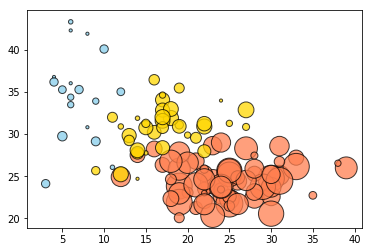

In [238]:
# Obtain the x and y coordinates for each of the three city types
# individual datasets created for each type for easier munging
urb_data = pd.DataFrame(nec_data.loc['Urban', ['city', 'driver_count', 'fare']]).reindex()
sub_data = pd.DataFrame(nec_data.loc['Suburban', ['city', 'driver_count', 'fare']]).reindex()
rur_data = pd.DataFrame(nec_data.loc['Rural', ['city', 'driver_count', 'fare']]).reindex()

# function used to mung (idk if I am using that word correctly) data sets previously created
def cln_cln(df):
    frsh = pd.unique(df['city'])
    so_frsh = []
    cln = df.set_index('city')
    for y in frsh:
        avg_f = cln.loc[y, 'fare']
        avg_f = round(avg_f.mean(), 2)
        num_dr = cln.loc[y, 'driver_count']
        num_rids = num_dr.value_counts()
        so_frsh.append({'city': y, 'Average Fare': avg_f, '# of Drivers': num_dr.values[0], '# of Rides': num_rids.values[0]})
        next
    return so_frsh

# use of function cln_cln
frshcln_urb = pd.DataFrame(cln_cln(urb_data))
frshcln_sub = pd.DataFrame(cln_cln(sub_data))
frshcln_rur = pd.DataFrame(cln_cln(rur_data))
# Build the scatter plots for each city types with use of a function
def scat_dat(df, fc):
    if fc == 0:
        fc = 'coral'
    elif fc == 1:
        fc = 'gold'
    else:
        fc = 'skyblue' 
    # creation of scatter plot with necessary characteristics, I also scaled the size of the points by
    # a multiple of 10 for greater ease of interpretation
    scat_it = plt.scatter(df['# of Rides'], df['Average Fare'], 
                          s= df['# of Drivers']*10, facecolors= fc, edgecolors='black', alpha= 0.75)
    return scat_it


# uses function scat_dat and displays the scatterplots overlapping one another
all_dat = plt.show([scat_dat(frshcln_urb, 0), (scat_dat(frshcln_sub, 1)), (scat_dat(frshcln_rur, 2))])
all_dat

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
